In [2]:
import torch.nn as nn
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
 
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1) 
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
  
    def forward(self, x):
    
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x


In [3]:
import torch 
import xlrd
from sklearn.preprocessing import StandardScaler
import numpy as np

N, D_in, H1, H2, D_out = 40, 5, 20, 12, 3
model = Net(D_in, H1, H2, D_out)

model.load_state_dict(torch.load("C:/Users/Gabriel/Documents/Python/ANN2.pt"))
model.eval()
book = xlrd.open_workbook('prepareddata.xlsx')
sheet = book.sheet_by_name('Sheet1')
data4 = [[sheet.cell_value(r, c)
         for c in range(0,5)] for r in range(0,7272)]
data5 = [[sheet.cell_value(r, c)
         for c in range(5,8)] for r in range(0,7272)]
scaler = StandardScaler()
scaler2 = StandardScaler()
scaler.fit(data4)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:


book = xlrd.open_workbook('Experimental Data edited.xlsx')
sheet = book.sheet_by_name('Sheet2')
data = [[sheet.cell_value(r, c)
         for c in range(1,6)] for r in range(114,126)]
data2 = [[sheet.cell_value(r, c)
         for c in range(1,4)] for r in range(114,126)]
data3 = [[sheet.cell_value(r, c)
         for c in range(1,4)] for r in range(115,127)]
scaler = StandardScaler(with_mean=True, with_std=True)


scaler.fit(data4)
scaler2.fit(data5)
n = np.array(data)
q= torch.tensor(n[0:1,:])
standardised_data = scaler.transform(data)

standardised_data2 = standardised_data[:, 0:3] 



x = torch.tensor(standardised_data[0:1,:])
z = torch.tensor(standardised_data2[0:1,:])
v = torch.tensor(data3)

for i in range(12):
     with torch.no_grad():
        dx_dt_pred = model(x.float())
     
        predictions= np.array(dx_dt_pred)
        descaled_predictions = scaler2.inverse_transform(predictions)
        usable_predictions = torch.tensor(descaled_predictions)
        q[:, 0:3]  = (usable_predictions*12) + q[:, 0:3]
        print(q[:, 0:3])
        np_x = np.array(q)
        standardised_data3 = scaler.transform(np_x)
        x=torch.tensor(standardised_data3)
     
        

print(v)




tensor([[3.1956e-01, 5.3022e+02, 4.9341e-01]], dtype=torch.float64)
tensor([[  0.5584, 277.5628,   0.9788]], dtype=torch.float64)
tensor([[ 0.7934, 30.3961,  1.4540]], dtype=torch.float64)
tensor([[   1.0235, -205.5936,    1.9161]], dtype=torch.float64)
tensor([[   1.2476, -422.3198,    2.3618]], dtype=torch.float64)
tensor([[   1.4644, -608.4565,    2.7865]], dtype=torch.float64)
tensor([[   1.6723, -748.6137,    3.1849]], dtype=torch.float64)
tensor([[   1.8697, -823.1300,    3.5515]], dtype=torch.float64)
tensor([[   2.0556, -809.3239,    3.8813]], dtype=torch.float64)
tensor([[   2.2296, -684.2452,    4.1717]], dtype=torch.float64)
tensor([[   2.3919, -427.1586,    4.4232]], dtype=torch.float64)
tensor([[  2.5437, -19.4791,   4.6393]], dtype=torch.float64)
tensor([[2.6670e-01, 7.2290e+02, 4.6200e-01],
        [4.5930e-01, 5.7480e+02, 7.7700e-01],
        [6.3910e-01, 5.1690e+02, 1.2180e+00],
        [8.7080e-01, 4.0420e+02, 1.8060e+00],
        [1.1327e+00, 3.3580e+02, 2.3520e+00],

ValueError: x and y must have same first dimension, but have shapes (12,) and (1, 1)

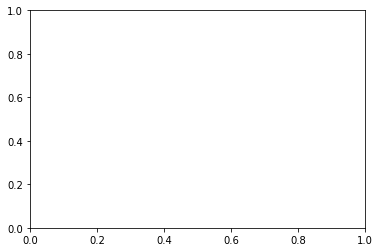

In [5]:
import numpy as np
a = np.linspace(12,144,12)

import matplotlib.pyplot as plt 
y1 = np_x[:, 0:1] 
x1 = a
plt.plot(x1, y1, label = "predicted") 

y2 = v[:, 0:1] 
x2 = a
plt.plot(x2, y2, label = "experimental") 

plt.legend()
plt.show() 

y1 = np_x[:, 1:2] 
x1 = a
plt.plot(x1, y1, label = "predicted") 

y2 = v[:, 1:2] 
x2 = a
plt.plot(x2, y2, label = "experimental") 

plt.legend()
plt.show() 

y1 = np_x[:, 2:3] 
x1 = a
plt.plot(x1, y1, label = "predicted") 

y2 = v[:, 2:3] 
x2 = a
plt.plot(x2, y2, label = "experimental") 

plt.legend()
plt.show() 

In [6]:
import pandas as pd
b=np.array(v)
c=np.array(x_pred)
book = xlrd.open_workbook('tested data.xlsx')
sheet = book.sheet_by_name('Sheet1')
writer = pd.ExcelWriter('tested data.xlsx', engine='xlsxwriter')
df1 = pd.DataFrame(b)
df1.to_excel(writer, header=True, index=True)
df2 = pd.DataFrame(c)
df2.to_excel(writer, startrow=13, header=True, index=True)
writer.save()

NameError: name 'x_pred' is not defined